# Analazing Religion and Income levels in USA

In [0]:
# Import the libraries here
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## 1. Data on Income and Religion from the Pew Forum

In [0]:
from google.colab import files
uploaded = files.upload()

Saving pew.csv to pew.csv


In [0]:
import io
pew = pd.read_csv(io.BytesIO(uploaded['pew.csv']))

In [0]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


## 2. Structure of the dataset

In [0]:
pew.shape

(18, 11)

In [0]:
pew.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

#### The columns contains values, which means dataset has three variables, *religion*, *income* and *frequency*. This means tidying of data is needed.

## 3. Tidying the dataset

In [0]:
pew_tidy=pd.melt(pew,id_vars="religion",var_name="income",value_name="number")
pew_tidy

,religion,income,number
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [0]:
pew_tidy.shape

(180, 3)

#### After tidying, the new data contains 180 rows and 3 columns.

## 4. Analysing the data

### 1) Check the NaN values

In [0]:
pew_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   religion  180 non-null    object
 1   income    180 non-null    object
 2   number    180 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


#### The data set does not include NaN values

### 2) Statistics with each religion

#### The following table shows the total number of believers for each religion.

In [0]:
pew_total=pew_tidy.pivot_table(index='religion',aggfunc=np.sum)
pew_total

,number
religion,
Agnostic,826
Atheist,515
Buddhist,411
Catholic,8054
Don’t know/refused,272
Evangelical Prot,9472
Hindu,257
Historically Black Prot,1995
Jehovah's Witness,215


#### Conclusion 1: The number of believers for each religion are very different. In order to get more insight, it is better to see the ratio of the believers with specific income.

In [0]:
religions=list(pew_tidy['religion'].unique())

#### The following table shows the maximum ratio of believers in each religion, with specific income

In [0]:
pew_max=pd.concat([pew_tidy[(pew_tidy['number']==pew_tidy[pew_tidy['religion']==element]['number'].max()) & \
                    (pew_tidy['religion']==element)] for element in religions],ignore_index=True)
pew_per_max=pew_max.set_index('religion')
pew_per_max['number']=pew_per_max['number']/pew_total['number']
pew_per_max

,income,number
religion,,
Agnostic,$50-75k,0.165860
Atheist,Don't know/refused,0.147573
Buddhist,$75-100k,0.150852
Catholic,Don't know/refused,0.184877
Don’t know/refused,Don't know/refused,0.426471
Evangelical Prot,Don't know/refused,0.161423
Hindu,>150k,0.210117
Historically Black Prot,Don't know/refused,0.169925
Jehovah's Witness,Don't know/refused,0.172093


#### The following table shows the minimum ratio of people in each religion, with specific income

In [0]:
pew_min=pd.concat([pew_tidy[(pew_tidy['number']==pew_tidy[pew_tidy['religion']==element]['number'].min()) & \
                    (pew_tidy['religion']==element)] for element in religions],ignore_index=True)
pew_per_min=pew_min.set_index('religion')
pew_per_min['number']=pew_per_min['number']/pew_total['number']
pew_per_min

,income,number
religion,,
Agnostic,<$10k,0.032688
Atheist,<$10k,0.023301
Buddhist,$10-20k,0.051095
Catholic,<$10k,0.051900
Don’t know/refused,$40-50k,0.036765
Evangelical Prot,>150k,0.043708
Hindu,<$10k,0.003891
Historically Black Prot,>150k,0.039098
Jehovah's Witness,>150k,0.027907


#### Conclusion 2: The max/min ratio of beliviers for earch religion with spefitic income are almost the same. It is better to compare the ratio of different believers with the same income.

### 3) Statistics with each income level

#### The following table shows the ratio of believers for each income level.

In [0]:
pew_rat=pew.set_index('religion').div(pew.set_index('religion').sum(axis=1), axis=0).reset_index()
pew_tidy2=pd.melt(pew_rat,id_vars="religion",var_name="income",value_name="ratio")
pew_tidy2

,religion,income,ratio
0,Agnostic,<$10k,0.032688
1,Atheist,<$10k,0.023301
2,Buddhist,<$10k,0.065693
3,Catholic,<$10k,0.051900
4,Don’t know/refused,<$10k,0.055147
...,...,...,...
175,Orthodox,Don't know/refused,0.201102
176,Other Christian,Don't know/refused,0.139535
177,Other Faiths,Don't know/refused,0.158129
178,Other World Religions,Don't know/refused,0.190476


In [0]:
income_levels=list(pew_tidy2['income'].unique())

#### The following table shows the maximum ratio of believers for different income level, with specific religion

In [0]:
pew_max=pd.concat([pew_tidy2[(pew_tidy2['ratio']==pew_tidy2[pew_tidy2['income']==element]['ratio'].max()) & \
                    (pew_tidy2['income']==element)] for element in income_levels],ignore_index=True)
pew_max

,religion,income,ratio
0,Other World Religions,<$10k,0.119048
1,Jehovah's Witness,$10-20k,0.125581
2,Historically Black Prot,$20-30k,0.118296
3,Historically Black Prot,$30-40k,0.119298
4,Other Faiths,$40-50k,0.109131
5,Muslim,$50-75k,0.198276
6,Hindu,$75-100k,0.182879
7,Hindu,$100-150k,0.186770
8,Jewish,>150k,0.221408
9,Don’t know/refused,Don't know/refused,0.426471


#### The following table shows the minimum ratio of believers for different income level, with specific religion

In [0]:
pew_min=pd.concat([pew_tidy2[(pew_tidy2['ratio']==pew_tidy2[pew_tidy2['income']==element]['ratio'].min()) & \
                    (pew_tidy2['income']==element)] for element in income_levels],ignore_index=True)
pew_min

,religion,income,ratio
0,Hindu,<$10k,0.003891
1,Jewish,$10-20k,0.027859
2,Hindu,$20-30k,0.027237
3,Hindu,$30-40k,0.035019
4,Don’t know/refused,$40-50k,0.036765
5,Other Christian,$50-75k,0.108527
6,Historically Black Prot,$75-100k,0.065664
7,Historically Black Prot,$100-150k,0.040602
8,Jehovah's Witness,>150k,0.027907
9,Agnostic,Don't know/refused,0.116223


#### Conclusion 3: It is clear that which believers have the maximum ratios in which income level. However, the ratio of some believers is max/min in different income level. It is also beneficial to see the comparison of the ratios between different believers and income levels.

### 4) Visualization of the data

#### The "Don't know/refused" column in the original data is not very informative. It can be excluded for comparison purposes.

In [0]:
pew_com=pew_rat.drop("Don't know/refused",axis=1)

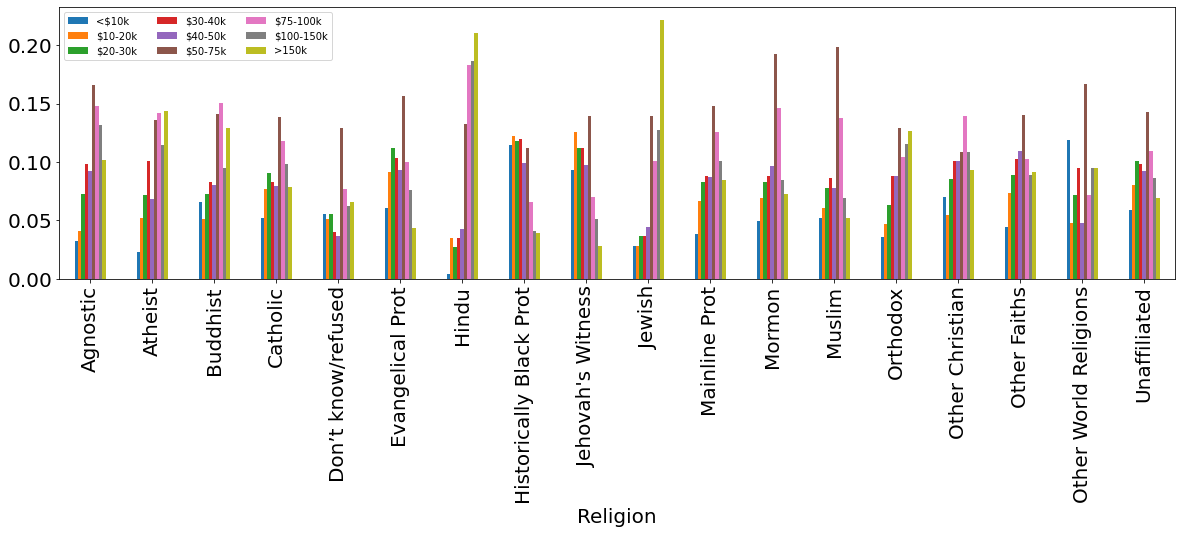

In [0]:
pew_plot1=pew_com.set_index('religion').plot.bar(figsize=(20,5),legend='reverse',fontsize=20)
pew_plot1.set_xlabel('Religion',fontsize=20);
pew_plot1.legend(loc="upper left", ncol = 3) 

#### Conclusion 4: The figure is very informative on various income level of each religion. The distribuion is versatile. 
- The income with "$50-75k" are majority in many religions.
- For some believers, the majority is at a midium income level, for example, Agnostics, Catholics.
- For some belierves, the majority is at a very high income level, for example, Hindus, and Jewish. 
- In any relision, the believers at low income are not majorities. 

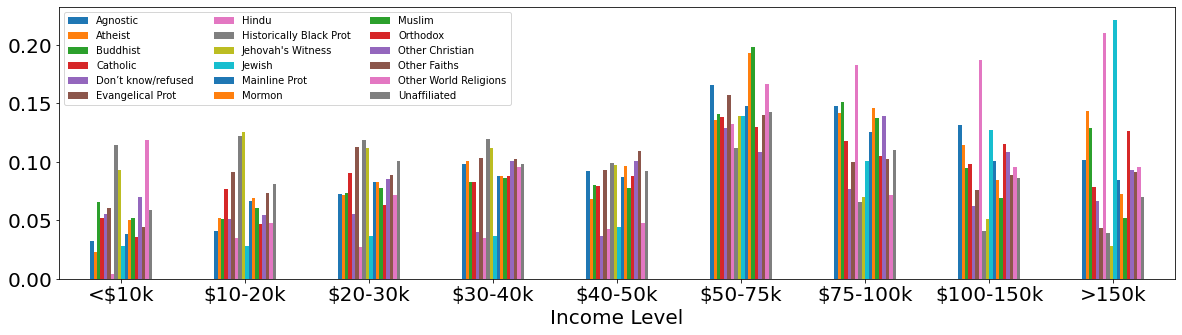

In [0]:
pew_plot2=pew_com.set_index('religion').T.plot.bar(figsize=(20,5),rot=0,fontsize=20)
pew_plot2.set_xlabel('Income Level',fontsize=20);
pew_plot2.legend(loc="upper left", ncol = 3) 

#### Conclusion 5: The information in this figure supports the previous conclusion. 
- The believers at low income levels are not the majority in any religion. 
- Believers with highest income levels are: Hindus and Jewish.

Moreover:
- The ratio of Hindus are the majority in higher income believers.
- The ratio of Historically Black Prot are the majority in lower income beliervers.